### Problem statement:-
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading and understanding the data

In [2]:
# Reading the dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
df.shape

(99999, 226)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## Handling missing values

#### Handling missing values in columns

In [6]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [7]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])

In [8]:
# Delete the columns having more than 30% missing values
df = df.drop(col_list_missing_30, axis=1)

In [9]:
df.shape

(99999, 186)

##### Deleting the date columns as the date columns are not required in our analysis

In [10]:
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [11]:
# Dropping date columns
df = df.drop(date_cols, axis=1)

Dropping circle_id column as this column has only one unique value. Hence there will be no impact of this column on the data analysis.

In [12]:
# Drop circle_id column
df = df.drop('circle_id', axis=1)

In [13]:
df.shape

(99999, 177)

### Filter high-value customers

Creating column `avg_rech_amt_6_7` by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.

In [14]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

Finding the 70th percentile of the avg_rech_amt_6_7

In [15]:
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

Filter the customers, who have recharged more than or equal to X.

In [16]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [17]:
df.shape

(30011, 178)

We can see that we have around ***~30K*** rows after filtering

#### Handling missing values in rows

In [18]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(114, 178)

In [19]:
# Deleting the rows having more than 50% missing values
df = df.drop(df_missing_rows_50.index)
df.shape

(29897, 178)

In [20]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


Looks like MOU for all the types of calls for the month of September (9) have missing values together for any particular record.

Lets check the records for the MOU for Sep(9), in which these coulmns have missing values together.

In [21]:
# Listing the columns of MOU Sep(9)
print(((df_missing_columns[df_missing_columns['null'] == 5.32]).index).to_list())

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [22]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,3.26,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.000,0.0,1325.91,28.61,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,0.0,0.0,0.0,734.641,183.668,0.000,0.0,4.38,0.98,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [23]:
df_null_mou_9.shape

(1590, 178)

In [24]:
# Deleting the records for which MOU for Sep(9) are null
df = df.drop(df_null_mou_9.index)

In [25]:
# Again Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


Looks like MOU for all the types of calls for the month of Aug (8) have missing values together for any particular record.

Lets check the records for the MOU for Aug(8), in which these coulmns have missing values together.

In [26]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [27]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,...,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,...,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
788,7000636808,0.0,0.0,0.0,532.742,546.756,0.0,269.274,1173.39,891.83,...,0,0,0,0,936,0.0,0.0,0.0,0.0,604.0
1802,7000516213,0.0,0.0,0.0,810.455,0.000,0.0,0.000,91.33,NaN,...,0,0,0,0,755,0.0,0.0,0.0,0.0,477.5
4837,7002192662,0.0,0.0,0.0,649.150,149.572,0.0,0.250,1354.24,85.13,...,0,0,0,0,520,0.0,0.0,0.0,0.0,421.0


In [28]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [29]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


Looks like MOU for all the types of calls for the month of Jun (6) have missing values together for any particular record.

Lets check the records for the MOU for Jun(6), in which these coulmns have missing values together.

In [30]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.44]).index).to_list())

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [31]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,...,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,...,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
423,7000635248,0.0,0.0,0.0,213.802,304.194,149.710,329.643,NaN,0.00,...,0,0,0,0,945,73.55,266.94,63.04,0.00,421.5
934,7002152278,0.0,0.0,0.0,48.000,764.152,500.030,194.400,NaN,14.24,...,0,0,2,1,490,188.83,215.00,0.00,24.18,651.0
1187,7000486275,0.0,0.0,0.0,0.000,757.170,995.719,0.000,NaN,1366.71,...,0,0,0,0,737,0.00,0.00,0.00,0.00,441.5


In [32]:
# Deleting the records for which MOU for Jun(6) are null
df = df.drop(df_null_mou_6.index)

In [33]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
...,...
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00
og_others_6,0.00


Looks like MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

Lets check the records for the MOU for Jul(7), in which these coulmns have missing values together.

In [34]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.12]).index).to_list())

['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [35]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,...,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,...,0,0,0,0,672,0.00,0.0,0.0,0.00,603.0
9955,7001658068,0.0,0.0,0.0,925.028,189.000,789.761,445.707,46.39,NaN,...,0,0,0,0,3107,0.00,0.0,0.0,0.00,692.5
10724,7001391499,0.0,0.0,0.0,894.818,85.000,207.040,363.314,117.21,NaN,...,0,0,0,0,2664,0.00,0.0,0.0,0.00,510.0
12107,7000131738,0.0,0.0,0.0,1803.475,0.000,0.600,25.243,1742.61,NaN,...,0,0,0,0,219,0.00,0.0,0.0,0.00,995.0


In [36]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [37]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


We can see there are no more missing values in any columns.

In [38]:
df.shape

(27991, 178)

In [39]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df.index)/30011)),2)

0.07

We can see that we have lost almost 7% records. But we have enough number of records to do our analysis.

### Tag churners

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

In [40]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [41]:
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


#### Deleting all the attributes corresponding to the churn phase

In [42]:
# List the columns for churn month(9)
col_9 = [col for col in df.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [43]:
# Deleting the churn month columns
df = df.drop(col_9, axis=1)

In [44]:
# Dropping sep_vbc_3g column
df = df.drop('sep_vbc_3g', axis=1)

#### Checking churn percentage

In [45]:
round(100*(df['churn'].mean()),2)

3.39

There is very little percentage of churn rate. We will take care of the class imbalance later.

## Outliers treatment

In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.

In [46]:
df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 29.3+ MB


In [48]:
# List only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


In [49]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(27705, 136)

### Derive new features

In [50]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Deriving new column `decrease_mou_action`
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [51]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [52]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [53]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [54]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [55]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,667,0.00,0.00,0.00,408.0,0,1341.41,1.560,-1339.850,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0


#### Deriving new column `decrease_rech_num_action`
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [56]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [57]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [58]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [59]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,21.89,459.0,0,711.67,597.705,-113.965,1,4.0,-6.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,408.0,0,1341.41,1.560,-1339.850,1,3.0,-16.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0


#### Deriving new column `decrease_rech_amt_action`
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [60]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [61]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [62]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [63]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1341.41,1.560,-1339.850,1,3.0,-16.0,1,15.0,-801.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,1067.43,1245.130,177.700,0,26.5,4.5,0,699.0,99.0,0


#### Deriving new column `decrease_arpu_action`
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [64]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [65]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [66]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [67]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,4.0,-6.0,1,254.0,-316.0,1,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,3.0,-16.0,1,15.0,-801.0,1,22.2395,-667.7685,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,26.5,4.5,0,699.0,99.0,0,617.7565,103.3035,0


#### Deriving new column `decrease_vbc_action`
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [68]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [69]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [70]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [71]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,699.0,99.0,0,617.7565,103.3035,0,0.000,0.000,0


## EDA

### Univariate analysis

##### Churn rate on the basis whether the customer decreased her/his MOU in action month

In [72]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

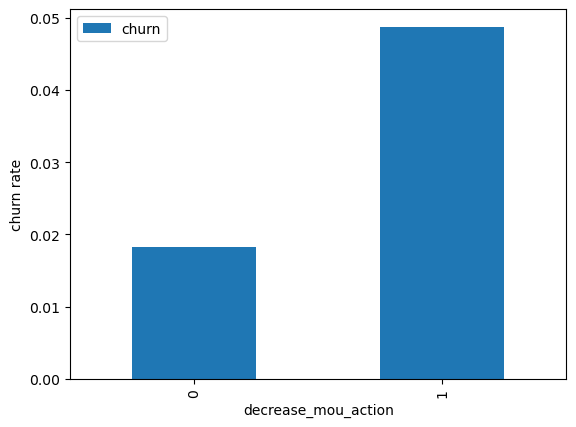

In [73]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase. 

##### Churn rate on the basis whether the customer decreased her/his number of recharge in action month

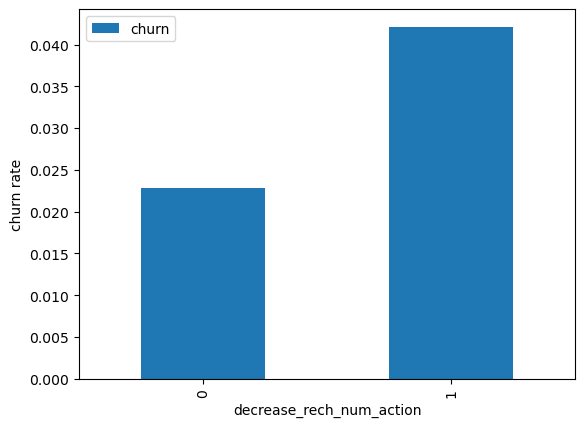

In [74]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

##### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

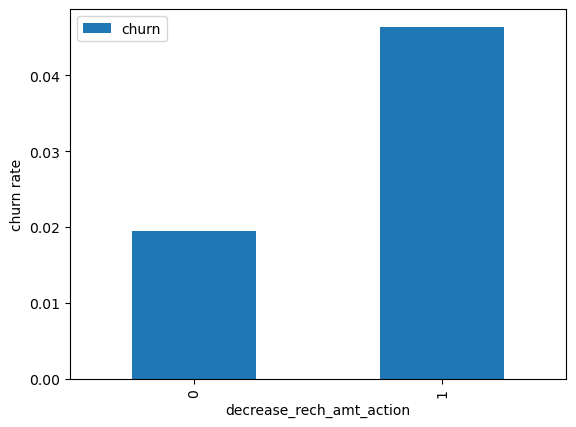

In [75]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

##### Churn rate on the basis whether the customer decreased her/his volume based cost in action month

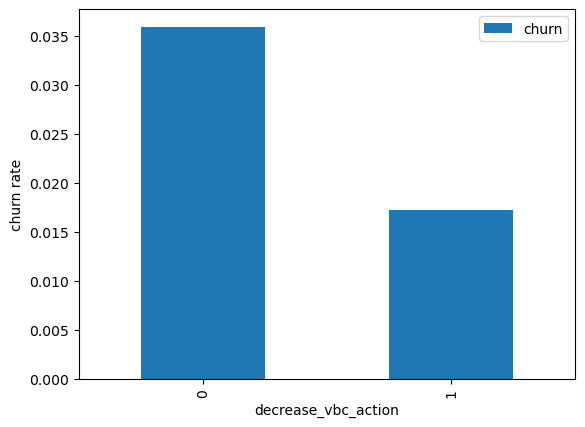

In [76]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

##### Analysis of the average revenue per customer (churn and not churn) in the action phase

In [77]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

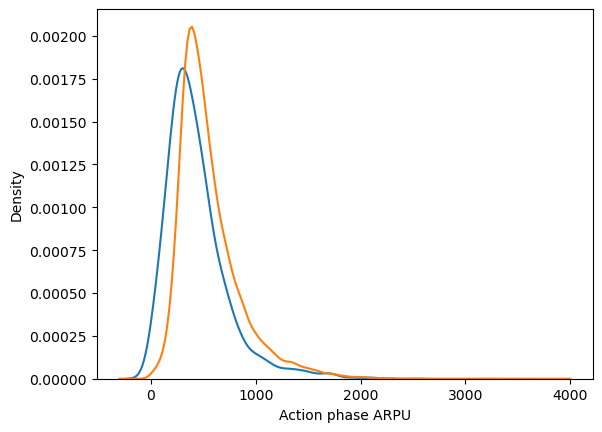

In [78]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000. 

##### Analysis of the minutes of usage MOU (churn and not churn) in the action phase

[Text(0.5, 0, 'Action phase MOU')]

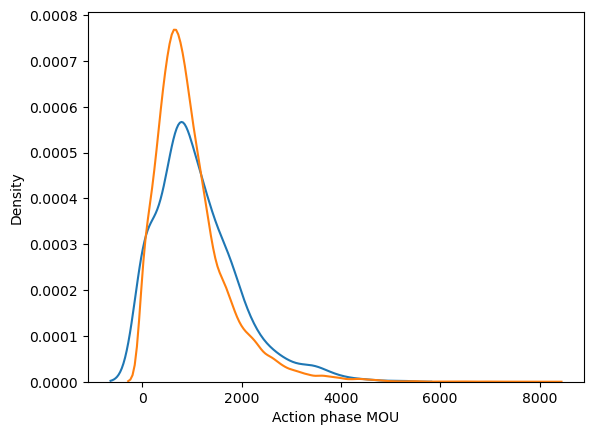

In [79]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

### Bivariate analysis

##### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

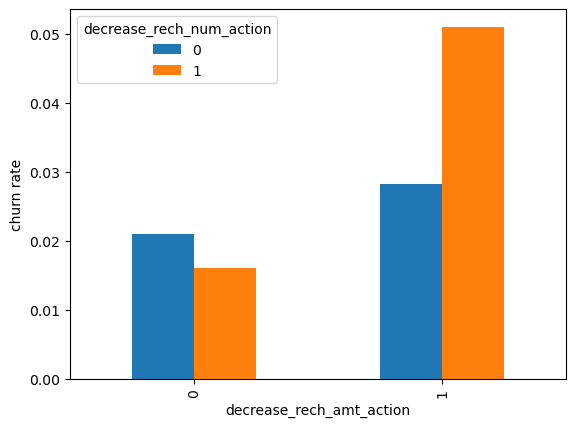

In [80]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

##### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

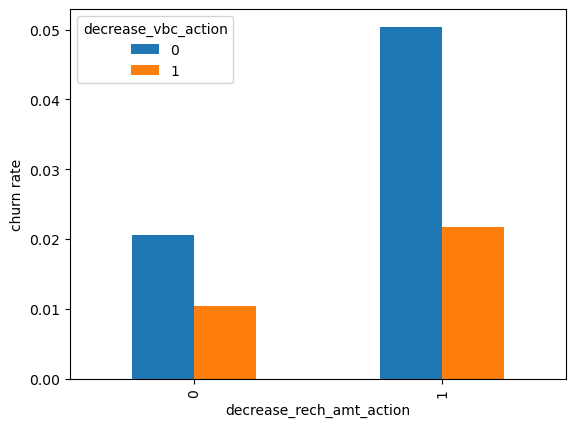

In [81]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

#### Dropping few derived columns, which are not required in further analysis

In [82]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

## Train-Test Split

In [83]:
# Import library
from sklearn.model_selection import train_test_split

In [84]:
# Putting feature variables into X
X = data.drop(['mobile_number','churn'], axis=1)

In [85]:
# Putting target variable to y
y = data['churn']

In [86]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with data imbalance

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [87]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [88]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [89]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [90]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [91]:
# Instantiate the Scaler
scaler = StandardScaler()

In [92]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [93]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [94]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,0.140777,-0.522792,-0.276289,0.106540,-0.662084,-0.465777,-0.211202,...,-0.113882,-0.361238,-0.236209,-0.265392,0.110582,1,1,1,1,1
1,0.0,0.0,0.0,-1.427243,4.428047,3.254270,-0.658491,-0.236590,-0.004450,-0.776075,...,-0.113882,-0.790173,-0.255884,-0.265392,-0.259366,0,0,0,0,0
2,0.0,0.0,0.0,-0.222751,0.543206,0.809117,-0.601239,-0.599206,-0.331043,-0.363395,...,2.526725,1.571302,3.307334,2.691063,1.700218,1,0,0,0,0
3,0.0,0.0,0.0,-0.911173,0.842273,0.731302,-0.702232,-0.650471,-0.458464,-0.789784,...,-0.113882,-0.951024,-0.255884,-0.265392,-0.259366,0,0,0,0,0
4,0.0,0.0,0.0,0.271356,0.247684,1.256421,-0.356392,-0.180394,0.114727,0.899204,...,-0.113882,-0.519757,-0.255884,-0.265392,-0.259366,0,0,0,0,0


##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [95]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
5704,0.0,0.0,0.0,0.244310,-0.268832,1.005890,-0.725286,-0.690223,-0.476634,0.483540,...,2.526725,0.225051,0.018023,0.194794,-0.259366,0,0,1,1,0
64892,0.0,0.0,0.0,0.048359,-0.779609,-0.157969,-0.734066,-0.698072,-0.502219,-0.358555,...,-0.113882,0.622516,2.423668,2.357564,5.861151,1,1,1,1,1
39613,0.0,0.0,0.0,0.545470,0.184388,1.403349,-0.537110,-0.521615,-0.206890,0.694901,...,-0.113882,2.966507,-0.255884,-0.265392,-0.259366,1,1,1,0,0
93118,0.0,0.0,0.0,0.641508,0.816632,-0.211023,-0.058843,0.029897,-0.155872,-0.148197,...,-0.113882,1.742643,-0.255884,-0.265392,-0.259366,1,0,1,1,0
81235,0.0,0.0,0.0,3.878627,0.911619,2.745295,4.117829,1.452446,2.809582,-0.002634,...,1.206422,-0.244679,-0.255884,-0.265392,-0.259366,1,1,1,1,0


# Model with PCA

In [96]:
#Import PCA
from sklearn.decomposition import PCA

In [97]:
# Instantiate PCA
pca = PCA(random_state=42)

In [98]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [99]:
# Principal components
pca.components_

array([[-7.50315936e-20,  4.16333634e-17, -2.22044605e-16, ...,
        -2.59799614e-02, -2.57740516e-02,  1.40032998e-02],
       [-1.61507486e-19,  2.77555756e-17, -1.11022302e-16, ...,
        -1.16737642e-02, -9.94022864e-03, -1.42598315e-02],
       [ 1.91332162e-19, -5.55111512e-17,  5.55111512e-17, ...,
        -4.18532955e-02, -4.28357226e-02,  2.46812846e-02],
       ...,
       [ 0.00000000e+00,  4.79287258e-01, -1.49737184e-01, ...,
        -1.38777878e-16,  2.77555756e-17,  1.94289029e-16],
       [ 9.99999732e-01, -2.39945089e-04, -6.72602248e-04, ...,
         2.86297136e-19,  5.03137571e-19, -1.91632734e-17],
       [ 0.00000000e+00,  4.01133132e-01, -2.92160679e-01, ...,
         2.11636264e-16, -3.46944695e-17,  2.08166817e-16]])

In [100]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11213256 0.19426234 0.24575583 0.28953571 0.32841891 0.36623473
 0.40173361 0.43144425 0.45702167 0.48194328 0.50480575 0.52673812
 0.54724457 0.5670202  0.58530008 0.60304258 0.6190213  0.63473458
 0.64927873 0.66341423 0.67712828 0.69025011 0.7020618  0.71278516
 0.72309435 0.73290234 0.74255604 0.75209676 0.76151565 0.77010093
 0.77861315 0.7866115  0.79429496 0.80173555 0.80878909 0.81538157
 0.82193734 0.8283476  0.83472622 0.84089758 0.84687761 0.85280024
 0.85840083 0.86374029 0.86901646 0.87418749 0.87891437 0.88341796
 0.887723   0.89186057 0.89588256 0.89966074 0.90339384 0.90704071
 0.91060084 0.91411689 0.91752343 0.92076319 0.92395413 0.92705111
 0.93001239 0.93296077 0.93580029 0.93862291 0.94138851 0.9441162
 0.94678675 0.94937767 0.95188405 0.95433786 0.95665036 0.95893735
 0.96116409 0.96323063 0.96526039 0.967203   0.96912626 0.97100138
 0.97284931 0.9746657  0.97639261 0.97806622 0.97972617 0.98133794
 0.98290963 0.98446566 0.98601222 0.98753485 0.98877905 0.98998

Text(0, 0.5, 'Cumulative Variance')

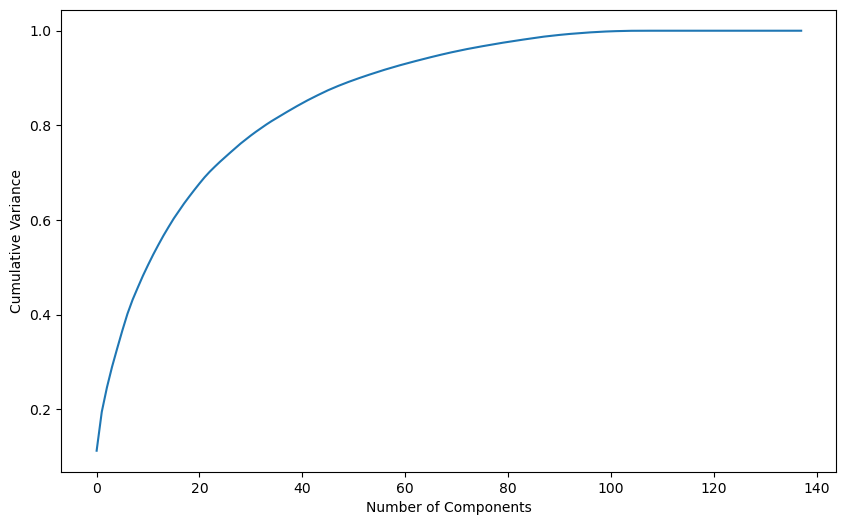

In [101]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that `60 components` explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

##### Performing PCA with 60 components

In [102]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [103]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [104]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

##### Applying transformation on the test set
We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [105]:
X_test_pca = pca_final.transform(X_test)

#### Emphasize Sensitivity/Recall than Accuracy

We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

## Logistic regression with PCA

In [106]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [107]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Tuning hyperparameter  C
C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [108]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [109]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [110]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.392149,0.071568,0.015634,0.000057,0.01,{'C': 0.01},0.900071,0.897759,0.895814,0.906425,...,0.897524,0.006134,5,0.901116,0.898256,0.899387,0.895440,0.897971,0.898434,0.001861
1,0.743223,0.066749,0.001423,0.002845,0.1,{'C': 0.1},0.898177,0.896359,0.894651,0.905959,...,0.896910,0.005390,6,0.901174,0.898431,0.899270,0.896725,0.899257,0.898971,0.001440
2,0.729898,0.021887,0.009963,0.007028,1,{'C': 1},0.898650,0.898693,0.895581,0.905028,...,0.897656,0.004783,4,0.901988,0.898606,0.898861,0.898184,0.899199,0.899368,0.001351
3,0.627058,0.036549,0.004160,0.006096,10,{'C': 10},0.898887,0.898459,0.896744,0.904562,...,0.897704,0.004719,3,0.902511,0.898956,0.898394,0.898476,0.899550,0.899577,0.001524
4,0.700566,0.087046,0.009893,0.008134,100,{'C': 100},0.899597,0.898226,0.896977,0.904330,...,0.897892,0.004528,1,0.902628,0.898722,0.898569,0.898593,0.899725,0.899648,0.001550
5,0.732955,0.066207,0.003560,0.006130,1000,{'C': 1000},0.899597,0.898226,0.896977,0.904330,...,0.897892,0.004528,1,0.902628,0.898839,0.898686,0.898593,0.899608,0.899671,0.001521


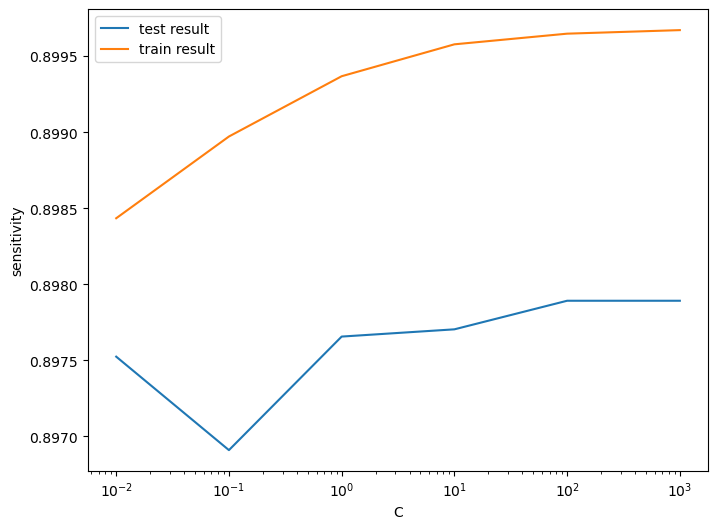

In [111]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [112]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8978916608693863 at C = 100


#### Logistic regression with optimal C

In [113]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [114]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

##### Prediction on the train set

In [115]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [116]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17908  3517]
 [ 2154 19271]]


In [117]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [118]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8676546091015169
Sensitivity:- 0.899463243873979
Specificity:- 0.8358459743290548


##### Prediction on the test set

In [119]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [120]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4452  896]
 [  36  157]]


In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8317993142032124
Sensitivity:- 0.8134715025906736
Specificity:- 0.8324607329842932


***Model summary***

- Train set
    - Accuracy = 0.86
    - Sensitivity = 0.89
    - Specificity = 0.83
- Test set
    - Accuracy = 0.83
    - Sensitivity = 0.81
    - Specificity = 0.83
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

## Decision tree with PCA

In [123]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

##### Hyperparameter tuning

In [124]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [125]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.475284,0.234379,0.013286,0.005842,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.862310,0.855776,0.878413,0.875379,0.855309,0.865438,0.009725,5
1,2.907104,0.215005,0.008651,0.006413,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.862310,0.855776,0.878413,0.875379,0.855309,0.865438,0.009725,5
2,2.631366,0.156620,0.007790,0.006992,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.858110,0.855309,0.875846,0.869078,0.849475,0.861564,0.009567,7
3,2.392732,0.092640,0.008939,0.007365,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.858110,0.855309,0.875846,0.869078,0.849008,0.861470,0.009686,8
4,4.420232,0.198719,0.014383,0.003726,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.886114,0.894516,0.903851,0.905484,0.912485,0.900490,0.009192,1
5,4.488047,0.239750,0.013282,0.002949,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.886114,0.894516,0.903851,0.905484,0.912485,0.900490,0.009192,1
6,4.446895,0.345409,0.011065,0.001528,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.889615,0.871179,0.875613,0.891949,0.883781,0.882427,0.007964,3
7,4.253626,0.168266,0.010323,0.000679,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.889615,0.869778,0.875613,0.891949,0.883781,0.882147,0.008369,4


In [126]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9004900816802801
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


##### Model with optimal hyperparameters

In [127]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [128]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [129]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18913  2512]
 [ 1763 19662]]


In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9002333722287048
Sensitivity:- 0.9177129521586931
Specificity:- 0.8827537922987164


##### Prediction on the test set

In [132]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [133]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4632  716]
 [  58  135]]


In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8603140227395777
Sensitivity:- 0.6994818652849741
Specificity:- 0.8661181750186986


***Model summary***

- Train set
    - Accuracy = 0.90
    - Sensitivity = 0.91
    - Specificity = 0.88
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.70
    - Specificity = 0.87
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

## Random Forest with PCA

In [136]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [137]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [138]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

In [139]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [140]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17285  4140]
 [ 2453 18972]]


In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8461376896149359
Sensitivity:- 0.885507584597433
Specificity:- 0.8067677946324388


### Prediction on the test set

In [143]:
y_test_pred = rfc_model.predict(X_test_pca)

In [144]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4272 1076]
 [  47  146]]


In [145]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [146]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7973290019852012
Sensitivity:- 0.7564766839378239
Specificity:- 0.7988032909498878


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.80
    - Specificity = 0.88
- Test set
    - Accuracy = 0.79
    - Sensitivity = 0.76
    - Specificity = 0.79
    

### Final conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.

# Without PCA

## Logistic regression with No PCA

In [147]:
##### Importing stats model
import statsmodels.api as sm

In [148]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [149]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [150]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42720
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 30 Jan 2024   Deviance:                       23572.
Time:                        20:38:26   Pearson chi2:                 3.71e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -57.0623   4421.136     -0.013      0.990   -8722.330    8608.205
loc_og_t2o_mou            1.622e-06      0.000      0.012      0.991      -0.000       0.000
std_og_t2o_mou           -4.446e-06      0.000     -0.012      0.990      -0.001       0.001
loc_ic_t2o_mou            1.197e-06   7.26e-05      0.016      0.987      -0.000       0.000
arpu_6                      -0.0337      0.081     -0.418      0.676      -0.192       0.125
arpu_7                       0.0855      0.086      0.995      0.320      -0.083       0.254
arpu_8                       0.0909      0.110      0.828      0.407      -0.124       0.306
onnet_mou_6                 15.5140      3.577      4.337      0.000       8.503      22.525
onnet_mou_7                 -4.3250      1.809     -2.390      0.017      -7.871      -0.778
onnet_mou_8                  2.3520      1.827      1.288      0.198      -1.228       5.932
offnet_mou_6                15.0883      3.365      4.484      0.000       8.493      21.683
offnet_mou_7                -1.7628      1.714     -1.028      0.304      -5.122       1.596
offnet_mou_8                -0.5503      1.884     -0.292      0.770      -4.243       3.143
roam_ic_mou_6                0.1622      0.036      4.483      0.000       0.091       0.233
roam_ic_mou_7               -0.0099      0.052     -0.189      0.850      -0.112       0.092
roam_ic_mou_8                0.2041      0.044      4.664      0.000       0.118       0.290
roam_og_mou_6               -5.1508      1.132     -4.549      0.000      -7.370      -2.932
roam_og_mou_7                0.8855      0.472      1.875      0.061      -0.040       1.811
roam_og_mou_8                0.0929      0.531      0.175      0.861      -0.948       1.134
loc_og_t2t_mou_6         -3303.0850    656.536     -5.031      0.000   -4589.871   -2016.299
loc_og_t2t_mou_7         -1474.6123    679.929     -2.169      0.030   -2807.248    -141.977
loc_og_t2t_mou_8          5516.0921    628.256      8.780      0.000    4284.734    6747.450
loc_og_t2m_mou_6         -3342.7094    664.292     -5.032      0.000   -4644.697   -2040.722
loc_og_t2m_mou_7         -1392.1030    641.241     -2.171      0.030   -2648.913    -135.293
loc_og_t2m_mou_8          5887.3476    670.372      8.782      0.000    4573.442    7201.253
loc_og_t2f_mou_6          -285.2472     56.723     -5.029      0.000    -396.423    -174.072
loc_og_t2f_mou_7          -123.0161     56.689     -2.170      0.030    -234.124     -11.908
loc_og_t2f_mou_8           487.3962     55.527      8.778      0.000     378.565     596.227
loc_og_t2c_mou_6             0.0433      0.022      1.975      0.048       0.000       0.086
loc_og_t2c_mou_7             0.0099      0.021      0.463      0.643      -0.032       0.052
loc_og_t2c_mou

***Model analysis***
1. We can see that there are few features have positive coefficients and few have negative.
2. Many features have higher p-values and hence became insignificant in the model.

***Coarse tuning (Auto+Manual)***

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [151]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

#### RFE with 15 columns

In [152]:

from sklearn.feature_selection import RFE

# Instantiate RFE with 15 columns
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the RFE model with the training set
rfe = rfe.fit(X_train, y_train)

In [153]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'og_others_7', 'og_others_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8',
       'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action'],
      dtype='object')


### Model-1 with RFE selected columns

In [154]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 30 Jan 2024   Deviance:                       30008.
Time:                        20:40:21   Pearson chi2:                 4.49e+06
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -53.0128   4235.111     -0.013      0.990   -8353.678    8247.653
offnet_mou_7            0.6096      0.026     23.449      0.000       0.559       0.661
offnet_mou_8           -3.2532      0.106    -30.548      0.000      -3.462      -3.045
roam_og_mou_8           1.2482      0.032     39.496      0.000       1.186       1.310
std_og_t2m_mou_8        2.4408      0.094     26.101      0.000       2.258       2.624
isd_og_mou_8           -1.0212      0.194     -5.271      0.000      -1.401      -0.641
og_others_7            -1.1915      0.862     -1.382      0.167      -2.881       0.498
og_others_8         -3780.7240   3.08e+05     -0.012      0.990   -6.08e+05    6.01e+05
loc_ic_t2f_mou_8       -0.7547      0.072    -10.487      0.000      -0.896      -0.614
loc_ic_mou_8           -1.9744      0.066    -30.078      0.000      -2.103      -1.846
std_ic_t2f_mou_8       -0.7922      0.075    -10.607      0.000      -0.939      -0.646
ic_others_8            -1.4913      0.132    -11.305      0.000      -1.750      -1.233
total_rech_num_8       -0.4840      0.018    -26.977      0.000      -0.519      -0.449
monthly_2g_8           -0.9031      0.043    -20.851      0.000      -0.988      -0.818
monthly_3g_8           -0.9871      0.043    -22.711      0.000      -1.072      -0.902
decrease_vbc_action    -1.3078      0.073    -17.956      0.000      -1.451      -1.165
=======================================================================================
"""

#### Checking VIFs

In [155]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [156]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.27
0,offnet_mou_7,1.92
8,loc_ic_mou_8,1.68
7,loc_ic_t2f_mou_8,1.21
11,total_rech_num_8,1.19
2,roam_og_mou_8,1.16
14,decrease_vbc_action,1.08
13,monthly_3g_8,1.06
6,og_others_8,1.05


##### Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99

In [157]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action']


### Model-2
Building the model after removing og_others_8 variable.

In [158]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15034.
Date:                Tue, 30 Jan 2024   Deviance:                       30068.
Time:                        20:40:23   Pearson chi2:                 4.51e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4957
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1052      0.031    -35.342      0.000      -1.167      -1.044
offnet_mou_7            0.6081      0.026     23.427      0.000       0.557       0.659
offnet_mou_8           -3.2557      0.106    -30.603      0.000      -3.464      -3.047
roam_og_mou_8           1.2491      0.031     39.747      0.000       1.188       1.311
std_og_t2m_mou_8        2.4428      0.093     26.146      0.000       2.260       2.626
isd_og_mou_8           -1.0982      0.196     -5.590      0.000      -1.483      -0.713
og_others_7            -1.8793      0.818     -2.299      0.022      -3.482      -0.277
loc_ic_t2f_mou_8       -0.7548      0.072    -10.491      0.000      -0.896      -0.614
loc_ic_mou_8           -1.9714      0.066    -30.058      0.000      -2.100      -1.843
std_ic_t2f_mou_8       -0.8020      0.075    -10.727      0.000      -0.949      -0.655
ic_others_8            -1.4871      0.132    -11.278      0.000      -1.746      -1.229
total_rech_num_8       -0.4864      0.018    -27.146      0.000      -0.522      -0.451
monthly_2g_8           -0.9066      0.043    -20.866      0.000      -0.992      -0.821
monthly_3g_8           -0.9862      0.043    -22.700      0.000      -1.071      -0.901
decrease_vbc_action    -1.3097      0.073    -17.994      0.000      -1.452      -1.167
=======================================================================================
"""

#### Checking VIF for Model-2

In [159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.27
0,offnet_mou_7,1.92
7,loc_ic_mou_8,1.68
6,loc_ic_t2f_mou_8,1.21
10,total_rech_num_8,1.19
2,roam_og_mou_8,1.16
13,decrease_vbc_action,1.08
12,monthly_3g_8,1.06
11,monthly_2g_8,1.05


As we can see from the model summary that all the variables p-values are significant and offnet_mou_8 column has the highest VIF 7.45. Hence, deleting offnet_mou_8 column.

In [160]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8')

### Model-3
Model after removing offnet_mou_8 column.

In [161]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42836
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15720.
Date:                Tue, 30 Jan 2024   Deviance:                       31440.
Time:                        20:40:24   Pearson chi2:                 3.92e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4793
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2058      0.032    -37.536      0.000      -1.269      -1.143
offnet_mou_7            0.3665      0.022     16.456      0.000       0.323       0.410
roam_og_mou_8           0.7135      0.024     29.260      0.000       0.666       0.761
std_og_t2m_mou_8       -0.2474      0.022    -11.238      0.000      -0.291      -0.204
isd_og_mou_8           -1.3811      0.212     -6.511      0.000      -1.797      -0.965
og_others_7            -2.4711      0.872     -2.834      0.005      -4.180      -0.762
loc_ic_t2f_mou_8       -0.7102      0.075     -9.532      0.000      -0.856      -0.564
loc_ic_mou_8           -3.3287      0.057    -58.130      0.000      -3.441      -3.216
std_ic_t2f_mou_8       -0.9503      0.078    -12.181      0.000      -1.103      -0.797
ic_others_8            -1.5131      0.129    -11.771      0.000      -1.765      -1.261
total_rech_num_8       -0.5060      0.018    -28.808      0.000      -0.540      -0.472
monthly_2g_8           -0.9279      0.044    -21.027      0.000      -1.014      -0.841
monthly_3g_8           -1.0943      0.046    -23.615      0.000      -1.185      -1.004
decrease_vbc_action    -1.3293      0.072    -18.478      0.000      -1.470      -1.188
=======================================================================================
"""

#### VIF Model-3

In [162]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,std_og_t2m_mou_8,1.87
0,offnet_mou_7,1.72
6,loc_ic_mou_8,1.33
5,loc_ic_t2f_mou_8,1.21
9,total_rech_num_8,1.17
12,decrease_vbc_action,1.07
1,roam_og_mou_8,1.06
11,monthly_3g_8,1.06
10,monthly_2g_8,1.05
7,std_ic_t2f_mou_8,1.02


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that ***Model-3 log_no_pca_3 will be the final model***.

###  Model performance on the train set

In [163]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    2.687411e-01
1    7.047483e-02
2    8.024370e-02
3    3.439222e-03
4    5.253815e-19
dtype: float64

##### Creating a dataframe with the actual churn and the predicted probabilities

In [164]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,2.687411e-01,0
1,0,7.047483e-02,1
2,0,8.024370e-02,2
3,0,3.439222e-03,3
4,0,5.253815e-19,4


##### Finding Optimal Probablity Cutoff Point

In [165]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.687411e-01,0,1,1,1,0,0,0,0,0,0,0
1,0,7.047483e-02,1,1,0,0,0,0,0,0,0,0,0
2,0,8.024370e-02,2,1,0,0,0,0,0,0,0,0,0
3,0,3.439222e-03,3,1,0,0,0,0,0,0,0,0,0
4,0,5.253815e-19,4,1,0,0,0,0,0,0,0,0,0


##### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [166]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.753629     0.984411     0.522847
0.2          0.2  0.788751     0.964714     0.612789
0.3          0.3  0.812509     0.946371     0.678646
0.4          0.4  0.829638     0.923874     0.735403
0.5          0.5  0.844131     0.895823     0.792439
0.6          0.6  0.844271     0.839860     0.848681
0.7          0.7  0.836173     0.769522     0.902824
0.8          0.8  0.800163     0.652275     0.948051
0.9          0.9  0.595426     0.207001     0.983851


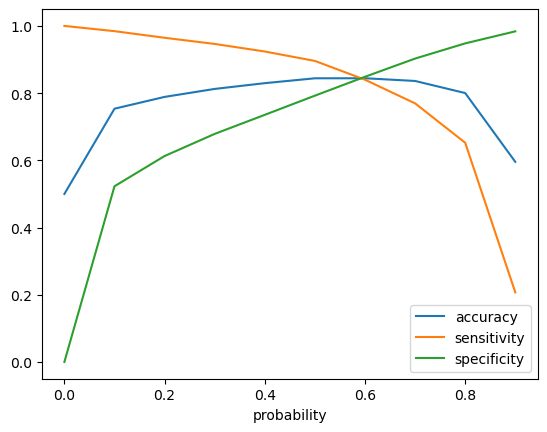

In [167]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

##### Analysis of the above curve
Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

`At point 0.6` where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking ***0.5*** for acheiving higher sensitivity, which is our main goal.

In [168]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,2.687411e-01,0,1,1,1,0,0,0,0,0,0,0,0
1,0,7.047483e-02,1,1,0,0,0,0,0,0,0,0,0,0
2,0,8.024370e-02,2,1,0,0,0,0,0,0,0,0,0,0
3,0,3.439222e-03,3,1,0,0,0,0,0,0,0,0,0,0
4,0,5.253815e-19,4,1,0,0,0,0,0,0,0,0,0,0


##### Metrics

In [169]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[16978  4447]
 [ 2232 19193]]


In [170]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [171]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8441306884480747
Sensitivity:- 0.8958226371061844
Specificity:- 0.792438739789965


We have got good accuracy, sensitivity and specificity on the train set prediction.

##### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [172]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

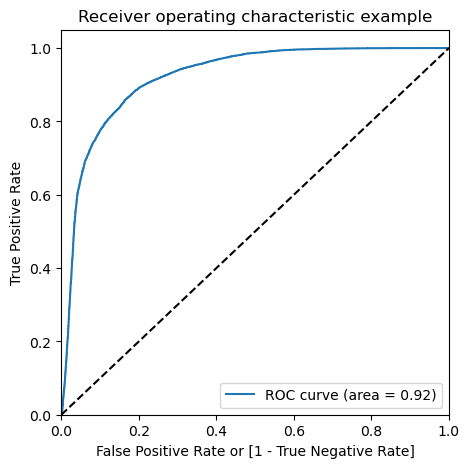

In [173]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

### Testing the model on the test set

In [174]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [175]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [176]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

##### Predictions on the test set with final model

In [177]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [178]:
y_test_pred.head()

5704     0.034015
64892    0.000578
39613    0.513564
93118    0.020480
81235    0.034115
dtype: float64

In [179]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.034015
64892,0.000578
39613,0.513564
93118,0.020480
81235,0.034115


In [180]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [181]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [182]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [183]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [184]:
y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.034015
1,0,64892,0.000578
2,0,39613,0.513564
3,0,93118,0.020480
4,0,81235,0.034115


In [185]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [186]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['CustID', 'churn', 'churn_prob'], axis=1)

In [187]:
y_test_pred_final.head()

,CustID,churn,churn_prob
0,5704,0,0.034015
1,64892,0,0.000578
2,39613,0,0.513564
3,93118,0,0.020480
4,81235,0,0.034115


In [188]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [189]:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,5704,0,0.034015,0
1,64892,0,0.000578,0
2,39613,0,0.513564,1
3,93118,0,0.020480,0
4,81235,0,0.034115,0


##### Metrics

In [190]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4190 1158]
 [  34  159]]


In [191]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [192]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.7848763761053962
Sensitivity:- 0.8238341968911918
Specificity:- 0.7834704562453254


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.81
    - Specificity = 0.83
- Test set
    - Accuracy = 0.78
    - Sensitivity = 0.82
    - Specificity = 0.78
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

### Plots of important predictors for churn and non churn customers

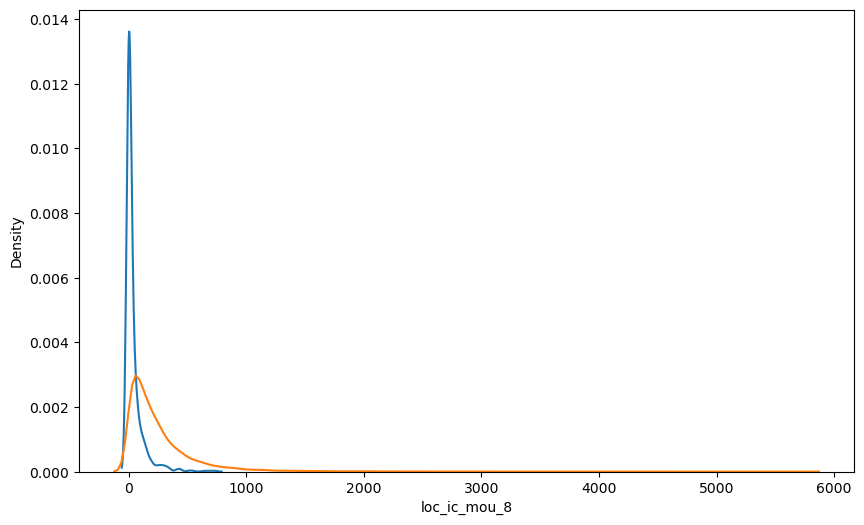

In [193]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

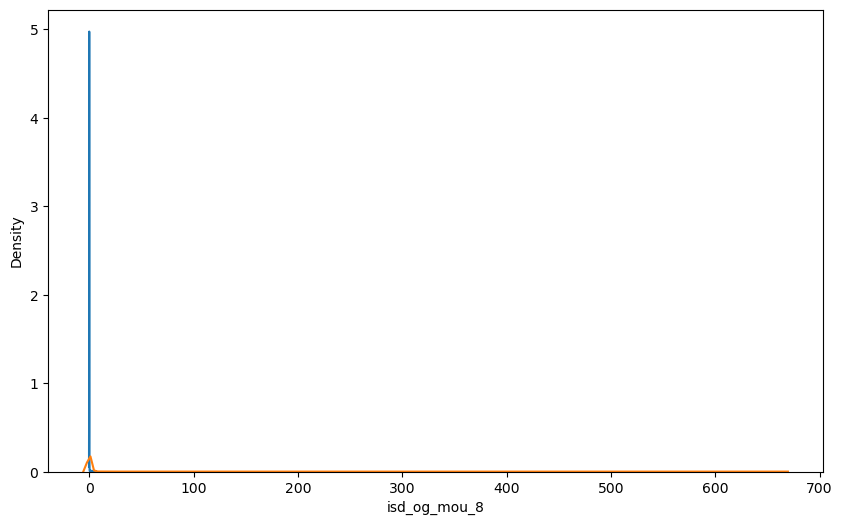

In [194]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is little more than the churn customers.

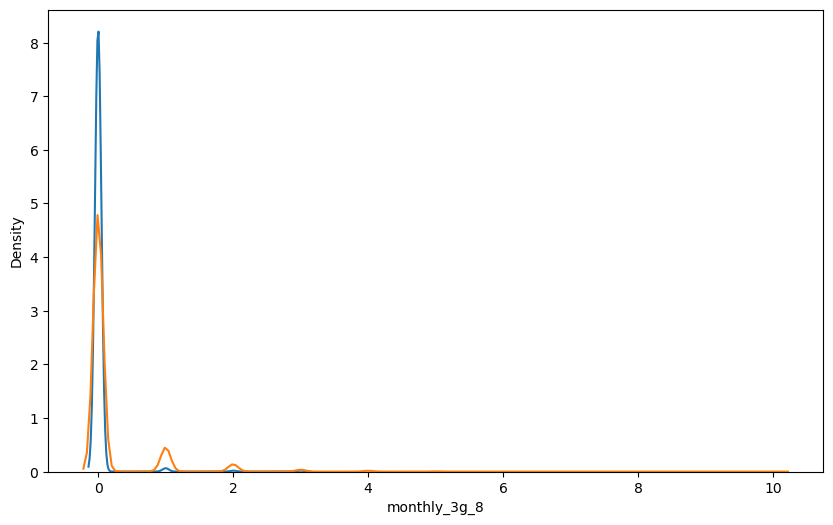

In [195]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()

The number of mothly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers.

Similarly we can plot each variables, which have higher coefficients, churn distribution.

## Business recomendation

Less number of **high value customer** are churing but for last **6 month** no new high valued customer is onboarded which is concerning and company should concentrate on that aspect.

Customers with less than **4 years** of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.

**Average revenue per user** seems to be most important feature in determining churn prediction.

**Incoming and Outgoing Calls** on romaing for 8th month are strong indicators of churn behaviour

## Recomendations

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
2. Target the customers, whose outgoing others charge in July and incoming others on August are less.
3. Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned. 
5. Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
6. Cutomers decreasing monthly 2g usage for August are most probable to churn.
7. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
8. roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.
